# Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)


plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

/Users/sb/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/sb/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/sb/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/sb/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loo

In [2]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.decomposition import PCA


In [36]:
pd.DataFrame(telco_scaled).head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.189446,-0.126231,-0.229045,-0.949284,-0.792884,0.689149,-0.648425,-0.951190,-0.660895,-0.594289,...,-0.962695,-0.970437,1.014099,-1.004008,-0.835868,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001
1,-0.695476,0.802534,2.607427,1.053425,-0.792884,0.689149,1.542199,-0.951190,1.513101,1.682682,...,1.038750,1.030464,1.014099,0.996008,-0.761419,0.484856,-0.749071,0.121006,1.275872,-0.768001
2,0.833025,0.544543,-0.229045,1.053425,-0.792884,0.689149,-0.648425,-0.951190,-0.660895,-0.594289,...,1.038750,1.030464,-0.986097,0.996008,0.700982,0.311301,-0.749071,1.240918,-0.598794,-0.768001
3,-0.695476,-0.526115,-0.938163,-0.949284,-0.792884,-1.451065,-0.648425,-0.951190,-0.660895,-0.594289,...,-0.962695,-0.970437,-0.986097,-1.004008,-0.224319,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
4,-0.936819,-0.564814,1.189191,-0.949284,-0.792884,-1.451065,-0.648425,-0.951190,-0.660895,-0.594289,...,1.038750,-0.970437,1.014099,0.996008,-0.559342,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
5,-0.212792,0.054362,-0.938163,1.053425,-0.792884,0.689149,-0.648425,-0.951190,-0.660895,-0.594289,...,1.038750,1.030464,-0.986097,-1.004008,0.025619,0.390189,-0.749071,-0.009650,-0.598794,-0.768001
6,-1.580398,-0.706708,1.898309,-0.949284,-0.792884,0.689149,-0.648425,1.051315,-0.660895,-0.594289,...,-0.962695,1.030464,-0.986097,-1.004008,-0.070102,-0.824695,-0.749071,-0.364289,-0.598794,1.302082
7,-0.534581,0.028563,0.480073,1.053425,1.261219,0.689149,1.542199,1.051315,1.513101,1.682682,...,1.038750,1.030464,1.014099,0.996008,-0.585931,2.015295,1.899915,0.718293,2.809212,1.302082
8,1.396158,1.189519,1.898309,1.053425,-0.792884,0.689149,-0.648425,1.051315,-0.660895,-0.594289,...,1.038750,1.030464,1.014099,0.996008,-0.192412,0.973965,-0.749071,-0.121641,-0.598794,-0.768001
9,-0.051897,-0.023035,0.480073,-0.949284,-0.792884,0.689149,-0.648425,1.051315,-0.660895,-0.594289,...,-0.962695,-0.970437,-0.986097,-1.004008,1.339121,-0.824695,-0.749071,0.214332,-0.598794,-0.768001


### Applyting PCA

In [38]:
pc = PCA(n_components=21)

In [39]:
pc.fit(telco_scaled)

PCA(copy=True, iterated_power='auto', n_components=21, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
#Cumulative Variance explainpd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':var1}, index=range(1,22))s
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([ 30.83,  48.9 ,  58.41,  64.07,  68.44,  72.39,  75.94,  78.78,
        81.41,  83.9 ,  86.16,  88.31,  90.39,  92.38,  94.22,  95.93,
        97.59,  98.95,  99.54,  99.87, 100.  ])

In [49]:
pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':var1}, index=range(1,22))

,Eigen_value,Cumm_variance
1,6.480142,30.83
2,3.797635,48.90
3,1.999028,58.41
4,1.190650,64.07
5,0.918424,68.44
6,0.830599,72.39
7,0.745286,75.94
8,0.596031,78.78
9,0.552472,81.41
10,0.524154,83.90


Approach 1: Try to trade-off between independent components (eigen value =1) and cummulative variance (around ~ 70%)

Approach 2: number of components have choosen as 9 based on cumulative variacne is explaining >75 % and individual component explaining >0.8 variance

In [59]:
pc_final=PCA(n_components=6).fit(telco_scaled)

In [60]:
pc_final.explained_variance_

array([6.48014217, 3.79763512, 1.99902737, 1.19062683, 0.91841551,
       0.83059207])

In [61]:
reduced_cr=pc_final.fit_transform(telco_scaled)  # the out put is Factors (F1, F2, ...F9)

In [62]:
dimensions = pd.DataFrame(reduced_cr)

In [63]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5","C6"]

In [70]:
print(dimensions.shape)
#pd.DataFrame(telco_scaled).head()
print(dimensions.head())

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.189446,-0.126231,-0.229045,-0.949284,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,...,-0.962695,-0.970437,1.014099,-1.004008,-0.835868,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001
1,-0.695476,0.802534,2.607427,1.053425,-0.792884,0.689149,1.542199,-0.95119,1.513101,1.682682,...,1.038750,1.030464,1.014099,0.996008,-0.761419,0.484856,-0.749071,0.121006,1.275872,-0.768001
2,0.833025,0.544543,-0.229045,1.053425,-0.792884,0.689149,-0.648425,-0.95119,-0.660895,-0.594289,...,1.038750,1.030464,-0.986097,0.996008,0.700982,0.311301,-0.749071,1.240918,-0.598794,-0.768001
3,-0.695476,-0.526115,-0.938163,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,...,-0.962695,-0.970437,-0.986097,-1.004008,-0.224319,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001
4,-0.936819,-0.564814,1.189191,-0.949284,-0.792884,-1.451065,-0.648425,-0.95119,-0.660895,-0.594289,...,1.038750,-0.970437,1.014099,0.996008,-0.559342,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001


## Clustering/ Segmentation

In [81]:
km_3=KMeans(n_clusters=3,random_state=123)
km_3.fit(dimensions)
KMeans?

In [74]:
km_4=KMeans(n_clusters=4,random_state=123).fit(dimensions)
#km_5.labels_

km_5=KMeans(n_clusters=5,random_state=123).fit(dimensions)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(dimensions)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(dimensions)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(dimensions)
#km_5.labels_

In [75]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_

In [76]:
telco_num.head(20)

,age,income,reside,tollfree,equip,callcard,wireless,multline,voice,pager,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,44.0,64.0,2,0,0,1,0,0,0,0,...,0.00,7.50,0.00,0,1,3,0,4,2,2
1,33.0,136.0,6,1,0,1,1,0,1,1,...,0.00,15.25,35.70,0,0,1,1,3,6,3
2,52.0,116.0,2,1,0,1,0,0,0,0,...,0.00,30.25,0.00,0,2,0,1,1,1,6
3,33.0,33.0,1,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0,1,3,0,4,2,2
4,30.0,30.0,4,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0,1,3,0,4,2,2
5,39.0,78.0,1,1,0,1,0,0,0,0,...,0.00,13.50,0.00,0,2,0,1,1,1,6
6,22.0,19.0,5,0,0,1,0,1,0,0,...,0.00,8.75,0.00,1,1,2,4,0,0,5
7,35.0,76.0,3,1,1,1,1,1,1,1,...,50.10,23.25,64.90,1,0,1,2,5,5,1
8,59.0,166.0,5,1,0,1,0,1,0,0,...,0.00,12.00,0.00,0,2,0,1,1,3,4
9,41.0,72.0,3,0,0,1,0,1,0,0,...,0.00,16.50,0.00,0,1,3,3,2,4,0


In [46]:
km_3.cluster_centers_

array([[-2.14984941, -0.49906682,  0.3228738 , -0.02268513,  0.00356153,
         0.07787807],
       [ 0.9896733 ,  2.07178104, -0.61984172,  0.05773634,  0.05127555,
        -0.2773855 ],
       [ 3.40580252, -1.73584063,  0.13479186, -0.02892774, -0.07821838,
         0.20790438]])

In [78]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

1    0.476
0    0.293
2    0.231
dtype: float64

In [79]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

3    0.318
0    0.264
2    0.209
1    0.209
dtype: float64

In [80]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

1    0.249
0    0.201
2    0.195
4    0.192
3    0.163
dtype: float64

### Choosing number clusters using Silhouette Coefficient

In [52]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(dimensions, km_6.labels_)

0.2545695839850128

In [54]:
# calculate SC for K=3 through K=12
k_range = range(2, 16)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(dimensions)
    scores.append(metrics.silhouette_score(dimensions, km.labels_))

In [55]:
scores

[0.2920072002608281,
 0.2887902490327796,
 0.26681356736225337,
 0.2520420306051588,
 0.2545695839850128,
 0.2363031411651769,
 0.24143238299098224,
 0.23013735157477444,
 0.22878760434604747,
 0.2146878452229389,
 0.2136156064747966,
 0.21112993306965946,
 0.2038082472568484,
 0.2066692520638246]

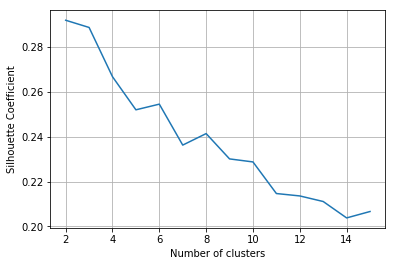

In [56]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

##### Note

The solution can be 5 based on the SC score. If we take highest SC score, 5 segment solution is best

# Profiling

In [63]:
telco_num.head()

,tenure,age,income,reside,tollfree,equip,callcard,wireless,multline,voice,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13,44.0,64.0,2,0,0,1,0,0,0,...,0.0,7.50,0.0,0,0,1,3,1,1,2
1,11,33.0,136.0,6,1,0,1,1,0,1,...,0.0,15.25,35.7,0,1,3,1,3,3,6
2,68,52.0,116.0,2,1,0,1,0,0,0,...,0.0,30.25,0.0,0,1,3,1,3,2,4
3,33,33.0,33.0,1,0,0,0,0,0,0,...,0.0,0.00,0.0,0,0,1,3,1,1,2
4,23,30.0,30.0,4,0,0,0,0,0,0,...,0.0,0.00,0.0,0,0,1,3,1,1,2


In [64]:
telco_num.cluster_3.value_counts()/sum(telco_num.cluster_3.value_counts())

0    0.483
1    0.299
2    0.218
Name: cluster_3, dtype: float64

In [65]:
telco_num.cluster_3.value_counts()*100/sum(telco_num.cluster_3.value_counts())

0    48.3
1    29.9
2    21.8
Name: cluster_3, dtype: float64

In [66]:
pd.Series.sort_index(telco_num.cluster_5.value_counts())

0    186
1    250
2    192
3    215
4    157
Name: cluster_5, dtype: int64

In [67]:
telco_num.cluster_3.size

1000

In [68]:
telco_num.cluster_3.value_counts()/telco_num.cluster_3.size

0    0.483
1    0.299
2    0.218
Name: cluster_3, dtype: float64

In [69]:
size=pd.concat([pd.Series(telco_num.cluster_3.size), pd.Series.sort_index(telco_num.cluster_3.value_counts()), pd.Series.sort_index(telco_num.cluster_4.value_counts()),
           pd.Series.sort_index(telco_num.cluster_5.value_counts()), pd.Series.sort_index(telco_num.cluster_6.value_counts()),
           pd.Series.sort_index(telco_num.cluster_7.value_counts()), pd.Series.sort_index(telco_num.cluster_8.value_counts())])

In [71]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/telco_num.cluster_3.size, columns=['Seg_Pct'])

In [72]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.483,0.299,0.218,0.212,0.318,0.198,0.272,0.186,0.25,...,0.077,0.177,0.142,0.158,0.166,0.168,0.091,0.138,0.065,0.072


In [73]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.0,483.000,299.000,218.000,212.000,318.000,198.000,272.000,186.000,250.00,...,77.000,177.000,142.000,158.000,166.000,168.000,91.000,138.000,65.000,72.000
Seg_Pct,1.0,0.483,0.299,0.218,0.212,0.318,0.198,0.272,0.186,0.25,...,0.077,0.177,0.142,0.158,0.166,0.168,0.091,0.138,0.065,0.072


In [74]:
telco_num.head()

,tenure,age,income,reside,tollfree,equip,callcard,wireless,multline,voice,...,equipmon,cardmon,wiremon,ebill,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13,44.0,64.0,2,0,0,1,0,0,0,...,0.0,7.50,0.0,0,0,1,3,1,1,2
1,11,33.0,136.0,6,1,0,1,1,0,1,...,0.0,15.25,35.7,0,1,3,1,3,3,6
2,68,52.0,116.0,2,1,0,1,0,0,0,...,0.0,30.25,0.0,0,1,3,1,3,2,4
3,33,33.0,33.0,1,0,0,0,0,0,0,...,0.0,0.00,0.0,0,0,1,3,1,1,2
4,23,30.0,30.0,4,0,0,0,0,0,0,...,0.0,0.00,0.0,0,0,1,3,1,1,2


In [75]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([telco_num.apply(lambda x: x.mean()).T, telco_num.groupby('cluster_3').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_5').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_7').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [76]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
tenure,35.526000,31.695652,42.698997,34.174312,34.221698,20.292453,54.797980,40.323529,26.725806,41.576000,...,63.324675,26.700565,53.859155,29.911392,20.945783,25.964286,61.648352,18.289855,52.953846,51.902778
age,41.645001,39.674949,46.227426,39.724771,39.816038,35.437107,48.171721,45.577207,36.849462,45.952001,...,56.428573,36.841808,48.661975,37.373418,35.969880,39.273810,53.604399,35.297101,51.415385,44.027778
income,73.781047,56.010351,94.705812,84.454172,82.188725,47.084904,81.399014,92.893504,53.806451,94.096132,...,196.169392,54.553672,78.563414,69.455696,44.108432,53.827379,125.956147,50.797101,174.446671,76.041665
reside,2.323000,2.296066,2.220736,2.522936,2.514151,2.317610,2.217172,2.257353,2.258065,2.244000,...,1.961039,2.231638,2.204225,2.620253,2.457831,2.321429,1.813187,2.173913,2.630769,2.250000
tollfree,0.474000,0.086957,0.866221,0.793578,0.806604,0.113208,0.101010,0.908088,0.107527,0.940000,...,0.896104,0.096045,0.070423,0.873418,0.078313,0.863095,0.901099,0.108696,0.984615,0.097222
equip,0.386000,0.360248,0.053512,0.899083,0.896226,0.427673,0.242424,0.044118,0.930108,0.052000,...,0.103896,0.926554,0.021127,0.943038,0.042169,0.077381,0.065934,0.884058,0.246154,0.972222
callcard,0.678000,0.443064,0.919732,0.866972,0.877358,0.147799,0.994949,0.911765,0.338710,0.940000,...,0.974026,0.344633,0.992958,0.854430,0.126506,0.839286,0.967033,0.123188,1.000000,0.972222
wireless,0.296000,0.037267,0.234114,0.954128,0.971698,0.047170,0.025253,0.257353,0.193548,0.276000,...,0.415584,0.163842,0.000000,0.974684,0.000000,0.202381,0.076923,0.101449,0.938462,0.361111
multline,0.475000,0.428571,0.381271,0.706422,0.707547,0.336478,0.636364,0.338235,0.661290,0.364000,...,0.792208,0.644068,0.535211,0.670886,0.144578,0.136905,0.648352,0.536232,0.723077,0.916667
voice,0.304000,0.082816,0.264214,0.848624,0.853774,0.094340,0.080808,0.283088,0.247312,0.292000,...,0.506494,0.231638,0.028169,0.873418,0.024096,0.214286,0.164835,0.202899,0.846154,0.333333


In [77]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [78]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.000000,483.000000,299.000000,218.000000,212.000000,318.000000,198.000000,272.000000,186.000000,250.000000,...,77.000000,177.000000,142.000000,158.000000,166.000000,168.000000,91.000000,138.000000,65.000000,72.000000
Seg_Pct,1.000000,0.483000,0.299000,0.218000,0.212000,0.318000,0.198000,0.272000,0.186000,0.250000,...,0.077000,0.177000,0.142000,0.158000,0.166000,0.168000,0.091000,0.138000,0.065000,0.072000
tenure,35.526000,31.695652,42.698997,34.174312,34.221698,20.292453,54.797980,40.323529,26.725806,41.576000,...,63.324675,26.700565,53.859155,29.911392,20.945783,25.964286,61.648352,18.289855,52.953846,51.902778
age,41.645001,39.674949,46.227426,39.724771,39.816038,35.437107,48.171721,45.577207,36.849462,45.952001,...,56.428573,36.841808,48.661975,37.373418,35.969880,39.273810,53.604399,35.297101,51.415385,44.027778
income,73.781047,56.010351,94.705812,84.454172,82.188725,47.084904,81.399014,92.893504,53.806451,94.096132,...,196.169392,54.553672,78.563414,69.455696,44.108432,53.827379,125.956147,50.797101,174.446671,76.041665
reside,2.323000,2.296066,2.220736,2.522936,2.514151,2.317610,2.217172,2.257353,2.258065,2.244000,...,1.961039,2.231638,2.204225,2.620253,2.457831,2.321429,1.813187,2.173913,2.630769,2.250000
tollfree,0.474000,0.086957,0.866221,0.793578,0.806604,0.113208,0.101010,0.908088,0.107527,0.940000,...,0.896104,0.096045,0.070423,0.873418,0.078313,0.863095,0.901099,0.108696,0.984615,0.097222
equip,0.386000,0.360248,0.053512,0.899083,0.896226,0.427673,0.242424,0.044118,0.930108,0.052000,...,0.103896,0.926554,0.021127,0.943038,0.042169,0.077381,0.065934,0.884058,0.246154,0.972222
callcard,0.678000,0.443064,0.919732,0.866972,0.877358,0.147799,0.994949,0.911765,0.338710,0.940000,...,0.974026,0.344633,0.992958,0.854430,0.126506,0.839286,0.967033,0.123188,1.000000,0.972222
wireless,0.296000,0.037267,0.234114,0.954128,0.971698,0.047170,0.025253,0.257353,0.193548,0.276000,...,0.415584,0.163842,0.000000,0.974684,0.000000,0.202381,0.076923,0.101449,0.938462,0.361111


In [79]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [80]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,1000.000000,483.000000,299.000000,218.000000,212.000000,318.000000,198.000000,272.000000,186.000000,250.000000,...,77.000000,177.000000,142.000000,158.000000,166.000000,168.000000,91.000000,138.000000,65.000000,72.000000
Seg_Pct,1.000000,0.483000,0.299000,0.218000,0.212000,0.318000,0.198000,0.272000,0.186000,0.250000,...,0.077000,0.177000,0.142000,0.158000,0.166000,0.168000,0.091000,0.138000,0.065000,0.072000
tenure,35.526000,31.695652,42.698997,34.174312,34.221698,20.292453,54.797980,40.323529,26.725806,41.576000,...,63.324675,26.700565,53.859155,29.911392,20.945783,25.964286,61.648352,18.289855,52.953846,51.902778
age,41.645001,39.674949,46.227426,39.724771,39.816038,35.437107,48.171721,45.577207,36.849462,45.952001,...,56.428573,36.841808,48.661975,37.373418,35.969880,39.273810,53.604399,35.297101,51.415385,44.027778
income,73.781047,56.010351,94.705812,84.454172,82.188725,47.084904,81.399014,92.893504,53.806451,94.096132,...,196.169392,54.553672,78.563414,69.455696,44.108432,53.827379,125.956147,50.797101,174.446671,76.041665
reside,2.323000,2.296066,2.220736,2.522936,2.514151,2.317610,2.217172,2.257353,2.258065,2.244000,...,1.961039,2.231638,2.204225,2.620253,2.457831,2.321429,1.813187,2.173913,2.630769,2.250000
tollfree,0.474000,0.086957,0.866221,0.793578,0.806604,0.113208,0.101010,0.908088,0.107527,0.940000,...,0.896104,0.096045,0.070423,0.873418,0.078313,0.863095,0.901099,0.108696,0.984615,0.097222
equip,0.386000,0.360248,0.053512,0.899083,0.896226,0.427673,0.242424,0.044118,0.930108,0.052000,...,0.103896,0.926554,0.021127,0.943038,0.042169,0.077381,0.065934,0.884058,0.246154,0.972222
callcard,0.678000,0.443064,0.919732,0.866972,0.877358,0.147799,0.994949,0.911765,0.338710,0.940000,...,0.974026,0.344633,0.992958,0.854430,0.126506,0.839286,0.967033,0.123188,1.000000,0.972222
wireless,0.296000,0.037267,0.234114,0.954128,0.971698,0.047170,0.025253,0.257353,0.193548,0.276000,...,0.415584,0.163842,0.000000,0.974684,0.000000,0.202381,0.076923,0.101449,0.938462,0.361111


In [81]:
Profling_output_final.to_csv('Profiling_output.csv')